# 교차검증

## 과적합

* 모델이 학습 데이터에만 과도하게 최적화 되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것

## 교차검증

* 데이터 편중을 막기 위해 별도의 여러 세트로 구성된 학습 데이터셋과 검증 데이터셋에서 학습과 평가를 수행하는 것
* 대부분의 ML모델의 성능 평가는 교차 검증 기반으로 1차 평가를 한 뒤에 최종적으로 테스트 세트에 적용해 평가

## K-Fold 교차검증

* K개의 데이터 폴드 세트를 만들어서, K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법

### K-Fold 교차검증 수행과정
1. 훈련세트를 K개의 폴드로 나눈다.
2. 첫 번째 폴드를 검증 세트로 사용하고 나머지 폴드(K-1)를 훈련세트로 사용한다.
3. 모델을 훈련한 후 검증세트로 평가한다.
4. 차례대로 다음 폴드를 검증세트로 사용하여 반복한다.
5. K개의 검증세트로 K번 성능을 평가한 후, 계산된 성능의 평균을 내어 최종 성능을 계산한다.

In [1]:
# 붓꽃데이터셋 로드 및 패키지 불러오기
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

In [2]:
iris = load_iris()

iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [3]:
# 붓꽃 데이터셋 로드
from sklearn.datasets import load_iris
# 테스트를 하기위해 결정트리 활용
from sklearn.tree import DecisionTreeClassifier
# 정확도 확인
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target

# 테스트를 하기 위해 결정 트리를 활용
dt_clf = DecisionTreeClassifier(random_state = 156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits = 5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기: ', features.shape[0])

붓꽃 데이터 세트 크기:  150


In [4]:
# 데이터프레임으로 데이터를 보고자 할 때
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
# shape은 객체의 행렬의 차원(행과 열 수)을 알려준다
features.shape

(150, 4)

In [8]:
# 초기 반복값은 0
n_iterator = 0
# KFold 객체의 split()를 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
# kfold.split가 피처를 모두 순회할 때까지 반복
for train_index, test_index in kfold.split(features):
    # kfold.split()로 반환된 인덱스를 이용하여 학습 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    # kfold.split()로 반환된 인덱스를 이용하여 검증 데이터 추출
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 소수점 4번째 자리까지만 표기(5번째에서 반올림)
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]

    # 기존 n_iterator변수에 1을 더해서 n_iterator에 저장(1씩 증가)
    n_iterator += 1

    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iterator, accuracy, train_size, test_size))
    print('#{0} 검증 데이터 인덱스:{1}'.format(n_iterator, test_index))
    cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 데이터 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 데이터 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 데이터 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 데이터 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 데이터 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


In [9]:
# 교차검증의검증 정확도
cv_accuracy

[1.0, 0.9667, 0.8667, 0.9333, 0.7333]

## Stratified K 폴드

* 불균형한 분포도를 가진 레이블 데이터 집합을 위한 K폴드 방식(특정 레이블값이 특이하게 많거나, 매우 적어서 값의 분포가 한쪽으로 치우치는 것)
* KFold로 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못하는 문제를 해결해 준다.

In [10]:
# 붓꽃 데이터셋 load_iris 임포트
from sklearn.datasets import load_iris    
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

# load_iris()를 이용하여 iris 데이터셋을 불러오고, iris라는 변수에 할당
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Iris 데이터셋의 타겟(레이블) 값을 DataFrame 객체인 iris_df에 'label'이라는 새로운 열로 추가
iris_df['label']=iris.target

In [11]:
# 'label' 열에 포함된 고유한 값의 개수를 계산하고, 그 값들의 빈도를 출력
print(iris_df['label'].value_counts())

0    50
1    50
2    50
Name: label, dtype: int64


In [12]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
kfold = KFold(n_splits = 3)
# kfold.split() 메서드는 인자로 받은 데이터에 대해 K-Fold 교차 검증을 수행하고,
# 각 반복에 대해 학습 데이터와 검증 데이터의 인덱스를 반환하는 이터레이터를 생성

n_iterator = 0

for train_index, test_index in kfold.split(iris_df):
    # 'kfold.split()' 메서드는 인자로 받은 데이터에 대해 K-Fold 교차검증을 수행
    # 학습 데이터, 검증 데이터로 반환하는 이터레이터 생성
    n_iterator += 1
    # 학습데이터의 레이블을 변수에 저장, 반환된 인덱스가 숫자이기 때문에 iloc 사용
    label_train = iris_df['label'].iloc[train_index]
    # 검증 데이터의 레이블을 변수에 저장
    label_test = iris_df['label'].iloc[test_index]
    print('ㅇ {0}번째 교차 검증'.format(n_iterator))
    print('##### 학습 레이블 데이터 분포 #####')
    print(label_train.value_counts())
    print('##### 검증 레이블 데이터 분포 #####')
    print(label_test.value_counts())
    print('\n')

ㅇ 1번째 교차 검증
##### 학습 레이블 데이터 분포 #####
1    50
2    50
Name: label, dtype: int64
##### 검증 레이블 데이터 분포 #####
0    50
Name: label, dtype: int64


ㅇ 2번째 교차 검증
##### 학습 레이블 데이터 분포 #####
0    50
2    50
Name: label, dtype: int64
##### 검증 레이블 데이터 분포 #####
1    50
Name: label, dtype: int64


ㅇ 3번째 교차 검증
##### 학습 레이블 데이터 분포 #####
0    50
1    50
Name: label, dtype: int64
##### 검증 레이블 데이터 분포 #####
2    50
Name: label, dtype: int64




In [14]:
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold를 이용하여 분할
skf = StratifiedKFold(n_splits = 3)
n_iterator = 0
# kfold와 다른점은 split()메서드에 인자로 피처 데이터 세트 뿐만 아니라 레이블 데이터 세트도 반드시 필요하다
for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iterator += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('ㅇ {0}번째 교차 검증'.format(n_iterator))
    print('##### 학습 레이블 데이터 분포 #####')
    print(label_train.value_counts())
    print('##### 검증 레이블 데이터 분포 #####')
    print(label_test.value_counts())
    print('\n')

ㅇ 1번째 교차 검증
##### 학습 레이블 데이터 분포 #####
2    34
0    33
1    33
Name: label, dtype: int64
##### 검증 레이블 데이터 분포 #####
0    17
1    17
2    16
Name: label, dtype: int64


ㅇ 2번째 교차 검증
##### 학습 레이블 데이터 분포 #####
1    34
0    33
2    33
Name: label, dtype: int64
##### 검증 레이블 데이터 분포 #####
0    17
2    17
1    16
Name: label, dtype: int64


ㅇ 3번째 교차 검증
##### 학습 레이블 데이터 분포 #####
0    34
1    33
2    33
Name: label, dtype: int64
##### 검증 레이블 데이터 분포 #####
1    17
2    17
0    16
Name: label, dtype: int64




### Stratified K 폴드를 이용한 데이터 분리

In [16]:
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
cv_accuracy=[]

n_iterator=0

# label 추가
for train_index, test_index  in skfold.split(features, label):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    n_iterator += 1

    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iterator, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iterator,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9667


## cross_val_score

기존의 K-Fold교차검증으로 데이터를 학습하고 예측하는 코드를 살펴볼 경우, 아래와 같은 절차로 진행된다.
1. 폴드 세트 설정
2. for루프에서 반복으로 학습 및 테스트 데이터의 인덱스 추출
3. 반복적으로 학습과 예측을 수행하고 예측 성능 반환

* cross_val_score는 이러한 일련의 과정을 한꺼번에 수행해주는 API이다.

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris
import numpy as np

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state = 156)

data = iris_data.data
label = iris_data.target

scores = cross_val_score(dt_clf, data, label, scoring = 'accuracy', cv = 3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


## GridSearch

* Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공
* grid는 격자라는 뜻으로, 촘촘하게 파라미터를 입력하면서 테스트를 하는 방식이다.
* 교차검증 기반으로 하이퍼파라미터의 최적값을 찾아준다.


* **estimator**: classifier, regressor, pipeline이 사용될 수 있음
* **param_grid**: 'key + 리스트' 값을 가지는 딕셔너리가 주어짐. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정
* **scoring**: 예측 성능을 측정할 평가 방법을 지정. 보통은 사이킷런의 성능 평가 지표를 지정하는 문자열(예: 정확도의 경우 'accuracy')로 지정하나 별도의 성능 평가 지표 함수도 지정할 수 있음
* **cv**: 교차검증을 위해 분할되는 학습/테스트 세트의 개수를 지정
* **refit**: default값은 True, True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼파라미터로 재학습 시킴

In [24]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd

# 데이터를 로딩하고 학습 데이터와 테스트데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 121)
dtree = DecisionTreeClassifier()

# 파라미터를 딕셔너리 형태로 설정
grid_parameters = {'max_depth':[1, 2, 3], 'min_samples_split': [2, 3]}

# param_gird의 하이퍼파라미터를 3개의 train. test set fold로 나누어 테스트 수행 설정
# refit = True가 default값, True면 가장 좋은 파라미터 설정으로 재학습시킴
grid_dtree = GridSearchCV(dtree, param_grid = grid_parameters, cv = 3, refit = True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


위의 주요 컬럼별 의미는 다음과 같다.

* GridSearchCV를 통해 최적의 파라미터와 그에 따른 정확도를 알아보면 아래와 같다.

In [26]:
print('GridSearchCV 최적 파라미터: ', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터:  {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


In [27]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 bset_estimator_는 이미 최적 학습이 되었으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667


# 데이터 전처리

## 데이터 전처리가 필요한 이유

1. 결손값, 즉 NaN, Null값은 허용되지 않는다.
    - Null값이 얼마 되지 않는다면 피처의 평균값 등으로 대체
    - Null값이 대부분이라면 해당 피처를 드롭하는 것도 방법
    - 중요도가 높은 피처는 유지

2. 문자열 값을 입력값으로 허용하지 않는다.
    - 문자열 값을 인코딩을 통해 숫자형으로 변환
    - 인코딩은 카테고리형(코드 값)으로 대부분 변환
    - 불필요한 피처라고 판단되면 드롭(삭제)

## 인코딩을 사용하는 이유

* 범주형 변수를 분류 모델에 넣으면 모델은 데이터를 인식하지 못하고 에러가 발생하게 된다.
* 따라서, 범주형 변수를 수치형 변수로 인코딩 처리를 해줘야 한다.
* Label Encoding과 One-Hot Encoding을 주로 사용한다.

## 레이블 인코딩

* 카테고리 피처를 코드형 숫자값으로 변환하는 것
* Label Encoding은 알파벳 순서에 따라 문자형 데이터를 unique한 숫자형으로 매핑하는 기법
* 단순히 문자형을 정수형으로 변환시켜주므로 데이터의 크기 및 shape이 변하지 않는다

In [28]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
items

['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

In [30]:
# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [31]:
# encoder.classes_ 명령어를 사용하면 인코더가 랜덤으로 배치한 인코딩 순서를 알 수 있다.
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [32]:
print('디코딩 원본값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


## 원-핫 인코딩

* 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식

In [33]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 2차원 ndarray로 변환
items = np.array(items).reshape(-1, 1)

# 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [34]:
# get_dummies()를 이용한 원핫인코딩
import pandas as pd
df = pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


# 사이킷런으로 수행하는 타이타닉 생존자예측

## 변수 설명

* Passengerid: 탑승자 데이터 일련번호

* Survived: 생존 여부 (0 = 사망, 1 = 생존)

* Pclass: 티켓의 선실 등급 (1 = 1등석, 2 = 2등석, 3 = 3등석)

* name: 탑승자 이름

* Sex: 탑승자 성별

* Age: 탑승자 나이

* SibSp: 함께 탑승한 형제자매 또는 배우자 인원수

* Parch: 함께 탑승한 부모님 , 어린이 인원수

* Fare: 요금

* Ticket: 티켓 번호

* Cabin: 선실 번호

* Embarked: 중간 정착 항구 (C = Cherbourg, Q = Queenstowm, S = Southampton)

## 데이터 전처리

In [35]:
# 필요패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
# 타이타닉 데이터 불러오기
titanic_df = pd.read_csv('C:/Users/chunc/Desktop/취업캠프/python/python/머신러닝과 딥러닝/titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [39]:
# 결측치를 평균값으로 대체
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('N', inplace = True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [40]:
print(' Sex값 분포:\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포:\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n', titanic_df['Embarked'].value_counts())

 Sex값 분포:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


* 데이터를 보면, N이 687건으로 가장 많은 것이 특이하며, 속성값이 제대로 정리가 되지 않아보인다. Cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보인다.

In [41]:
# 첫번째 문자만 선택
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head())

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


In [42]:
# 성별에 따른 생존여부(0: 사망, 1: 생존)
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

## 데이터 시각화

<Axes: xlabel='Sex', ylabel='Survived'>

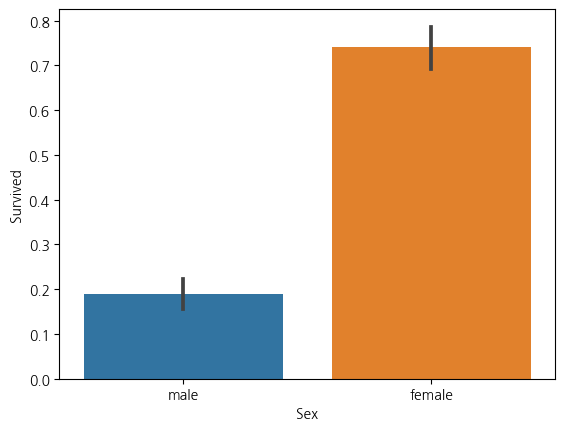

In [43]:
# 성별에 따른 막대차트 구현
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

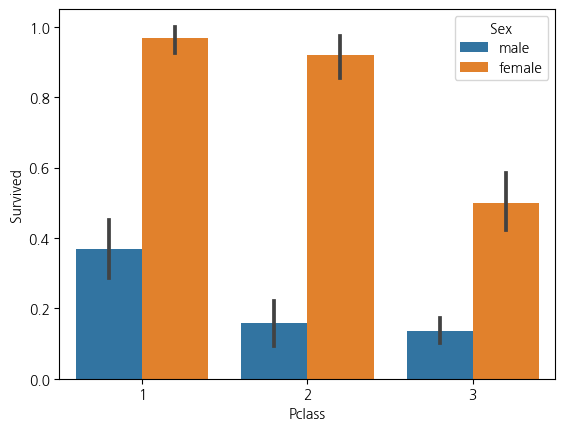

In [44]:
# 객실 등급에 따른 막대차트 구현
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

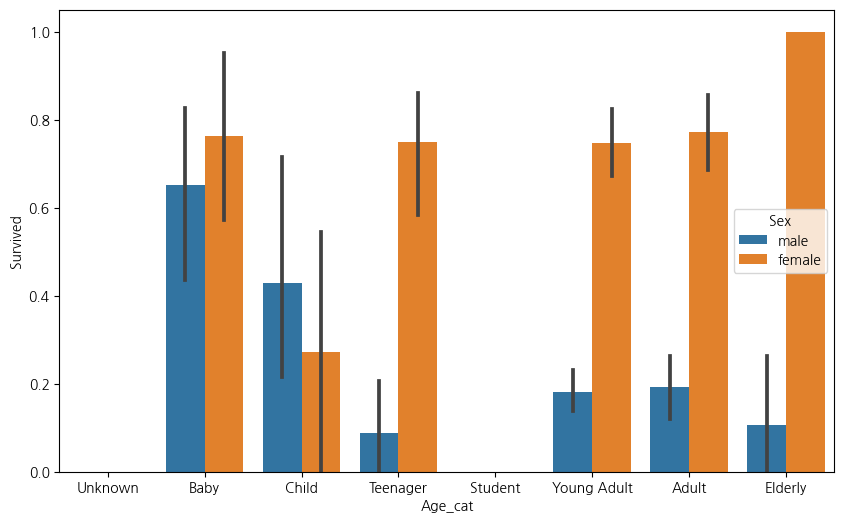

In [47]:
# Age에 따른 생존 확률
# 범위별로 분류하여 카테고리 값을 할당
# 입력 age에 따라 구분값을 반환하는 함수 설정
def get_category(age):
    cat = ''
    if age <= - 1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Studnet'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
        
    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize = (10, 6))

# x축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda식에 위에서 생성한 get_category()함수를 반환값으로 지정
# get_category(x)는 입력값으로 Age컬럼값을 받아서 해당하는 cat반환
# titanic_df['Age'] -> 'Age'열에 있는 모든 데이터 선택
# apply() -> 각 요소에 대해 주어진 함수를 적용하고 그 결과를 반환
# 'lambda x: get_category(x)' -> 'Age'열의 각 값에 대해 get_category()함수를 호출(인자로 받은 x를 get_category()함수)
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, order = group_names)
titanic_df.drop('Age_cat', axis = 1, inplace = True)

## 데이터 인코딩

In [49]:
# 문자열 카테고리 피처를 인코딩으로 변환(LabelEncoder이용)
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


* 앞서 작성해왔던 부분들을 함수화를 하여 사용하고자 한다.

In [54]:
# 지금까지의 과정을 함수화하여 사용
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

# 앞에서 설정한 데이터 전ㄴ처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [55]:
# 위 함수를 활용해보기 위해 원본 데이터를 재로딩하고, 피처데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv('C:/Users/chunc/Desktop/취업캠프/python/python/머신러닝과 딥러닝/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)

X_titanic_df = transform_features(X_titanic_df)

In [56]:
len(X_titanic_df)

891

## 모델 예측

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 14)

In [58]:
# 다양한 알고리즘(의사결정트리, 랜덤 포레스트, 로지스틱 회귀)을 이용하여 생존자 예측해보기
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 의사결정트리
dt_clf = DecisionTreeClassifier(random_state = 14)
# 랜덤포레스트
rf_clf = RandomForestClassifier(random_state = 14)
# 로지스틱 회귀
lr_clf = LogisticRegression(solver = 'liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf .fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.8268
RandomForestClassifier 정확도: 0.8156
LogisticRegression 정확도: 0.8212


## 교차검증

In [59]:
# 교차검증
# k-fold, cross_val_score(), GridSearchCV 사용
# 1. K-Fold
from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
    # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits = folds)
    scores = []

    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차검증별로 학습과 검증 데이터를 가리키는 index생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도 {1:.4f}'.format(iter_count, accuracy))

    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf, folds = 5)

교차 검증 0 정확도 0.7486
교차 검증 1 정확도 0.7809
교차 검증 2 정확도 0.8034
교차 검증 3 정확도 0.7753
교차 검증 4 정확도 0.8258
평균 정확도: 0.7868


In [62]:
# 2. cross_val_score()
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
    
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7697
교차 검증 2 정확도: 0.8034
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8315
평균 정확도: 0.7857


* cross_val_score()와 k-fold의 정확도가 다르게 나타남 -> cross_val_score()가 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문이다.

In [66]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8062
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8547


# 분류의 성능 평가

## 분류모델 성능 평가 지표

* 정확도(Accuracy)
* 오차행렬(Confusion Matrix)
* 정밀도(Precision)
* 재현율(Recall)
* F1 Score
* ROC AUC

* **True Positive**: 모델이 '참'이라고 예측했는데 실제값도 '참'인 경우(긍정 예측, 참)
* **True Negative**: 모델이 '거짓'으로 예측했는데 실제값도 '거짓'인 경우(부정 예측, 참)
* **False Positive**: 모델이 '참'이라고 예측했는데 실제값은 '거짓'인 경우(긍정 예측, 거짓) -> Type1오류(1종 오류)
* **False Negative**: 모델이 '거짓'이라고 예측했는데 실제값은 '참'인 경우(부정 예측, 거짓) -> Type2오류(2종 오류)

### 정확도(Accuracy)
* 전체 예측건수에서 정답을 맞춘 건수
* 올바르게 분류되는 빈도를 측정하는 평가 지표
* 정밀도 및 재현율과 함께 사용
* True Positive + True Negative / True Positive + True Negative + False Positive + False Negative

### 재현율(Recall)
* 실제 정답이 '참'일때, 모델에 맞게 예측한 비율
* 올바르게 분류된 '참'의 비율, '민감도' 또는 '적중률'이라고도 불림
* 실제 '참'인 경우를 놓치지 않고 잘 예측하는 능력
* True Positive / True Positive + False Negative


### 정밀도(Precision)
* 모델이 '참'이라고 예측했을 때, 실제 정답이 '참'인 경우
* 정확하게 예측한 '참'의 비율로 재현율과는 트레이드-오프 관계
* 주로 분류모델에 사용됨
* True Positive / True Positive + False Positive

### F1-Score
* 정밀도와 재현율의 트레이드-오프 관계를 보완하기 위해 조화평균 이용
* 2 * (정밀도 * 재현율) / (정밀도 + 재현율)

## 오차행렬

* 학습된 분류 모델이 예측을 수행하면서, 얼마나 혼동하고 있는지 보여주는 지표
* 전통적으로 혼동행렬은 의학에서 맹렬하게 연구

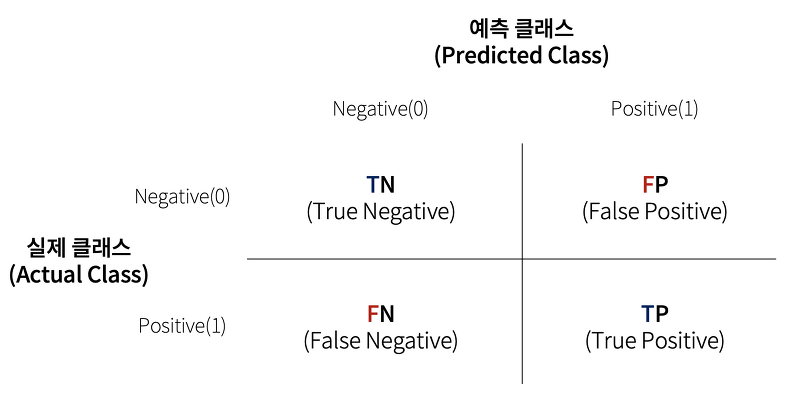

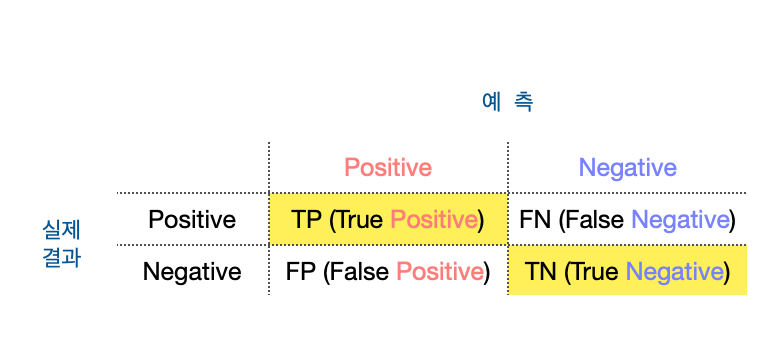

## 재현율과 정밀도의 트레이드-오프

* 재현율을 높이려 하면 정밀도가 낮아지고, 정밀도를 높이려 하면 재현율이 낮아지는 관계
* '참'으로 판단하는 기준(임계값)을 높이면, 동일한 상황에서 '거짓'이라고 할 가능성이 높기 때문에 '참'예측 건수 대비 실제 '참'인 건수의 비율이 높아질 수 있음 -> 정밀도가 높아짐
* 다만 더 많은 상황에 대해 '거짓'으로 판단하기 때문에 실제 '참'인 건수를 놓칠 수 있음 -> 재현율이 낮아짐

* 반대로 임계점을 낮게 조정한다면, (예를 들어)마이클 조던의 슛 성공을 긍정적으로 판단하여, 더 많은 경우에 '성공'으로 예측하도록 하면, 분자와 분모가 함께 증가하여 재현율이 높아짐
* 득점 성공으로 예측한 수에 비해 맞춘 개수가 둘어들 수 있기 때문에 정밀도는 낮아진다

### 재현율과 정밀도의 트레이드-오프(스팸메일의 경우)
1. 실제 스펨메일인데 스팸메일이 아니라고 판단되어(설정한 임계값이 높기 때문), 스팸메일로 분류하기 위해서는 정밀도를 낮춰야 한다. -> 임계값을 낮추어 재현율을 높혀준다.
2. 실제 스팸메일이 아닌데도 스팸메일로 분류되어(설정한 임계값이 낮기 때문), 스팸메일로 분류되는 것을 피하기 위헤서는 정밀도를 올려줘야 한다. -> 임계값을 높혀 재현율을 낮춰준다
3. 재현율이 증가하면 정밀도가 감소하고 역도 성립하는 관계이기 때문에 목적에 맞게 재현율과 정밀도를 사용하여 임계값을 조절하는것이 필요하다.